# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train_p2.p'
testing_file = './traffic-signs-data/test_p2.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = y_train.max() + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

# read the lables from csv file
import csv
with open('signnames.csv', mode='r') as signfile:
    reader = csv.reader(signfile)
    sign_dict = {row[0]: row[1] for row in reader}

('Number of training examples =', 39209)
('Number of testing examples =', 12630)
('Image data shape =', (32, 32, 3))
('Number of classes =', 43)


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

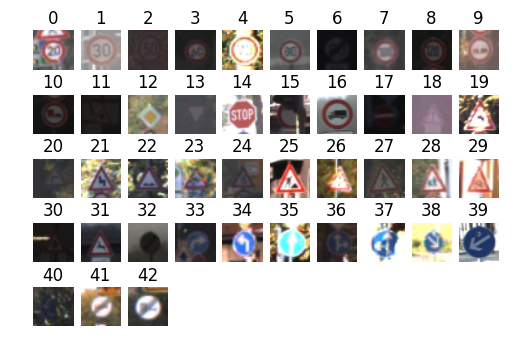

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# Visualizations will be shown in the notebook.
%matplotlib inline

ytrain_cnt = []
ytest_cnt = []

gs = gridspec.GridSpec(5, 10)
gs.update(wspace=0.01, hspace=0.02)
plt.figure()

for idx in range(n_classes):
    cnt = y_train == idx
    cnt = cnt.astype(np.float32, copy=False)
    idx_n0 = cnt.nonzero()[0]
    ytrain_cnt.append(cnt.sum())
    
    cnt = y_test == idx
    cnt = cnt.astype(np.float32, copy=False)
    ytest_cnt.append(cnt.sum())
    
    ax1 = plt.subplot(gs[idx])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    
    plt.subplot(5, 10, idx+1)
    plt.imshow(X_train[idx_n0[0]].squeeze())
    plt.title("%d" % idx)
    plt.axis('off')

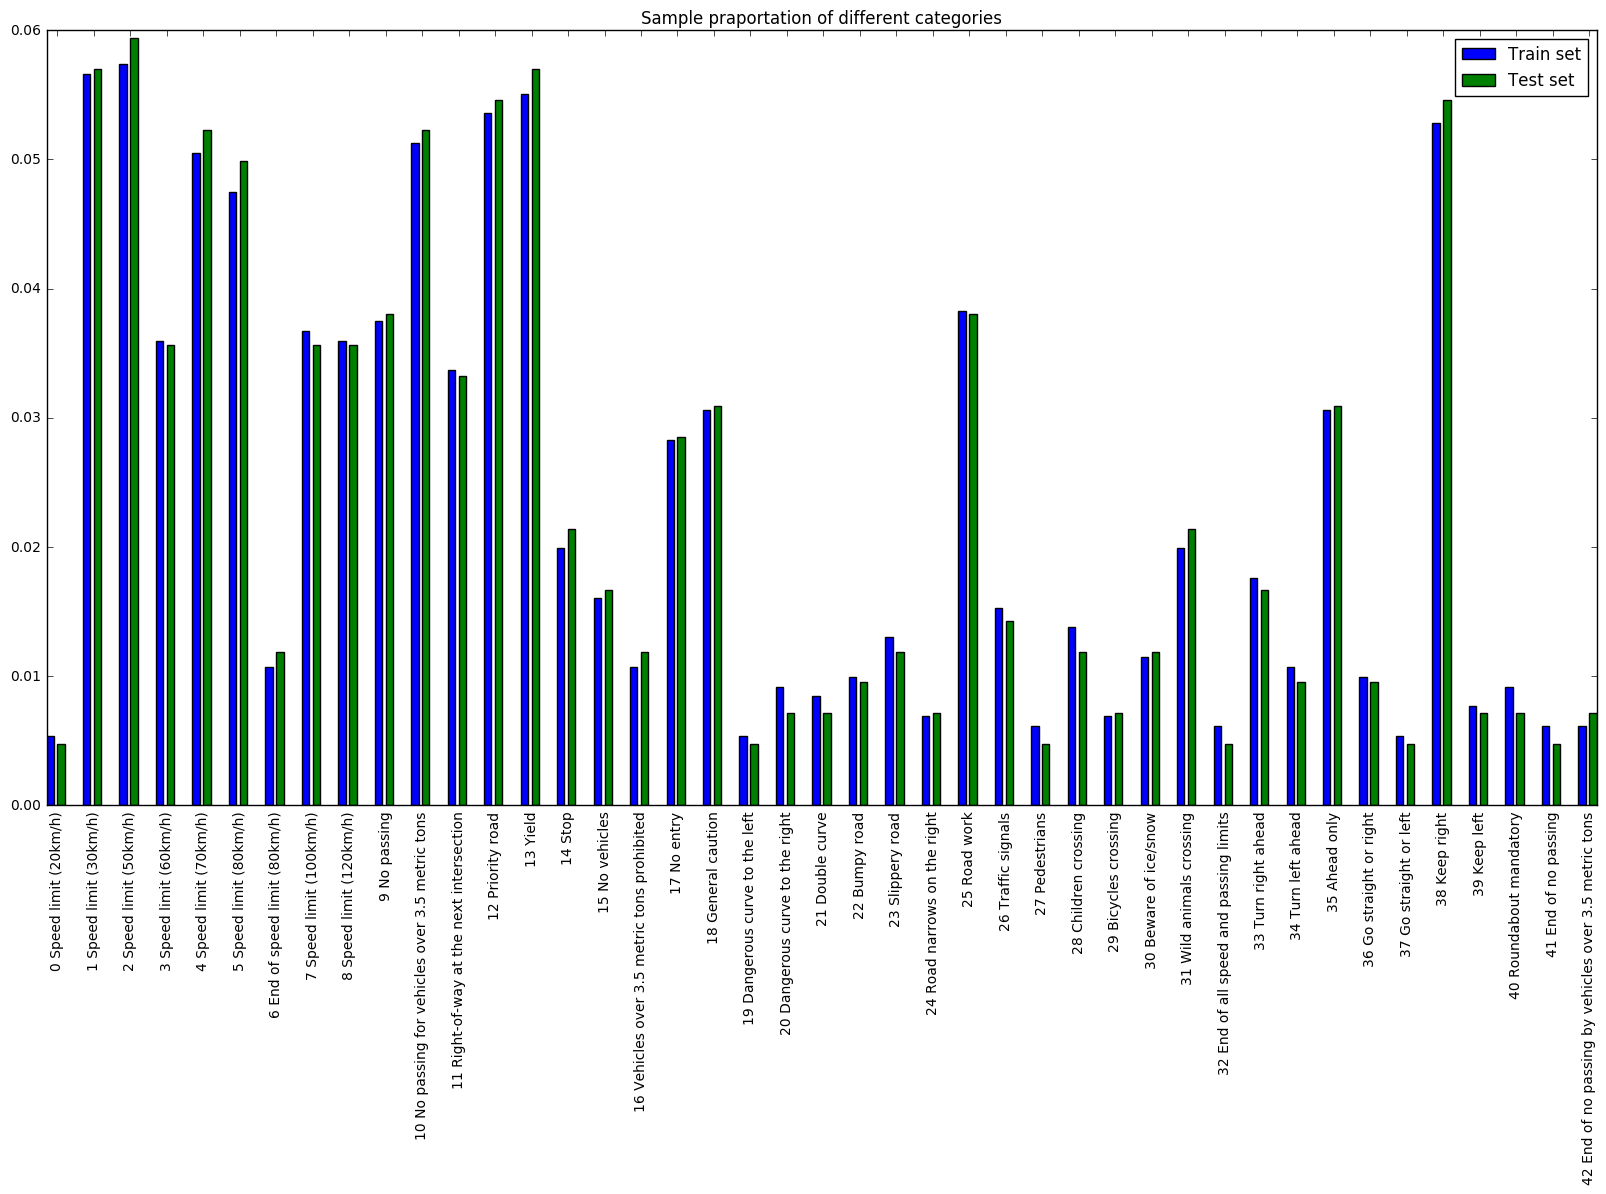

In [4]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set_xticks(np.arange(n_classes)+0.2)
ax.set_xticklabels(map(lambda i: str(i) + " " + sign_dict[str(i)], range(n_classes)), rotation='vertical')
plt.bar(np.arange(n_classes), np.array(ytrain_cnt/sum(ytrain_cnt)), width=0.2, color='b', align='center')
plt.bar(np.arange(n_classes)+0.3, np.array(ytest_cnt/sum(ytest_cnt)), width=0.2, color='g', align='center')
ax.legend(['Train set', 'Test set'])
ax.set_title("Sample praportation of different categories")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
# Preprocess the data here.
### Feel free to use as many code cells as needed.
import math
from sklearn.preprocessing import normalize

from scipy.signal.signaltools import convolve2d
from scipy.signal.windows import gaussian
import skimage.transform
from numpy.random import choice

# Y-channel global and local normalization
def create_kernel(dim0, dim1):
    """Create a two-dimensional LPF kernel, with a half-Hamming window along
    the first dimension and a Gaussian along the second.
    Parameters
    ----------
    dim0 : int
        Half-Hamming window length.
    dim1 : int
        Gaussian window length.
    Returns
    -------
    kernel : np.ndarray
        The 2d LPF kernel.
    """
    dim0_weights = np.hamming(dim0 * 2 + 1)[:dim0]
    dim1_weights = gaussian(dim1, dim1 * 0.25, True)
    kernel = dim0_weights[:, np.newaxis] * dim1_weights[np.newaxis, :]
    return kernel / kernel.sum()

def lcn(X, kernel):
    """Apply Local Contrast Normalization (LCN) to an array.
    Parameters
    ----------
    X : np.ndarray, ndim=2
        Input representation.
    kernel : np.ndarray
        Convolution kernel (should be roughly low-pass).
    Returns
    -------
    Z : np.ndarray
        The processed output.
    """
    if X.ndim != 2:
        raise ValueError("Input must be a 2D matrix.")
    Xh = convolve2d(X, kernel, mode='same', boundary='symm')
    V = X - Xh
    S = np.sqrt(convolve2d(np.power(V, 2.0),
                kernel, mode='same', boundary='symm'))
    S2 = np.zeros(S.shape) + S.mean()
    S2[S > S.mean()] = S[S > S.mean()]
    if S2.sum() == 0.0:
        S2 += 1.0
    return V / S2

def normalize_input(X_data, kernel):
    eps = 1e-5
    for idx in xrange(len(X_data)):
        X_data_y = X_data[idx, :, :, 0]
        X_data_y = (X_data_y - X_data_y.mean()) / np.max([X_data_y.std(), eps])
        X_data[idx, :, :, 0] = lcn(X_data_y, kernel)
    
    return X_data

def geometry_augmentation(X, y):
  
    rotation = np.linspace(math.radians(-15), math.radians(15), 10)
    scale = np.linspace(0.9, 1.1, 5)
    shear = np.linspace(-0.1, 0.1, 10)
    translation = np.arange(-2, 2, 1)
    
    X_data_exp = np.array([])
    y_data_exp = np.array([])
    
    for iidx in xrange(5): # generate 5 new samples
        r = choice(rotation)
        sc = choice(scale)
        sh = choice(shear)
        ty = choice(translation)
        tx = choice(translation)
            
        aff_mat = skimage.transform.AffineTransform(scale=(sc, sc), rotation=r, shear=sh, translation=(tx,ty))
        X_new = skimage.transform.warp(X, aff_mat)
        if len(X_data_exp) == 0:
            X_data_exp = X_new[np.newaxis, ...]
            y_data_exp = y
        else:
            X_data_exp = np.vstack((X_data_exp, X_new[np.newaxis,...]))
            y_data_exp = np.hstack((y_data_exp, y))
    
    return X_data_exp, y_data_exp

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
It can be easily found that the quality of some images are quite low, even cannot be clearly differentiated by eyes. Besides, all the images are limited to the size of 32 by 32, which further deteriorate the classification. Therefore, how to improve the image contrast is the most important. As stated in [LeCun's paper](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf), the RGB image is converted to [YCbCr](https://en.wikipedia.org/wiki/YCbCr), which is more perceptually meaningful. Thereafter, image processing could be implemented on Y-channel. Based on LeCun's paper, the global and local contrast normalization operations are applied on the Y-channel, where the local contrast normalization codes are adopted from [Humphrey's toolkit](https://github.com/ejhumphrey/dl4mir/blob/master/dl4mir/common/lcn.py). The testing accuracy on the test set exhibits the advantage of contrast enhancement over the original RGB input (testing accuracy improved from 90.3% to 93.6%).

**Supplementation**

Some other techniques could also be tried, such as gray transformation. Gray transformation can enhance the contrast as shown below, where the "End of speed limit" is given, but it's so hard to decide. In contrast, the corresponding gray image is much easier to see. Some further operations could be adopted over gray image, such as histogram equalization. As stated in this [website](http://scikit-image.org/docs/dev/auto_examples/plot_equalize.html), histogram equalization may introduce some unnatural effects. In contrast, [contrast stretch](http://homepages.inf.ed.ac.uk/rbf/HIPR2/stretch.htm) may have better effects. The results in later section exhibits that contrast stretch may be a little better than histogram equalization. To decide when to implement histogram equalization, a simple function, [is_low_contrast](https://github.com/scikit-image/scikit-image/blob/master/skimage/exposure/exposure.py#L459), introduced in the package of skimage is used. By comparing the range of brightness spans with a threshold, this function can decide whether an image is in low contrast. Therefore, the threshold parameter is very important, and based on some observations, 0.1 is selected, a little bigger than the default.

In [13]:
from skimage.color import rgb2gray
import skimage.exposure
from skimage.util.dtype import dtype_limits

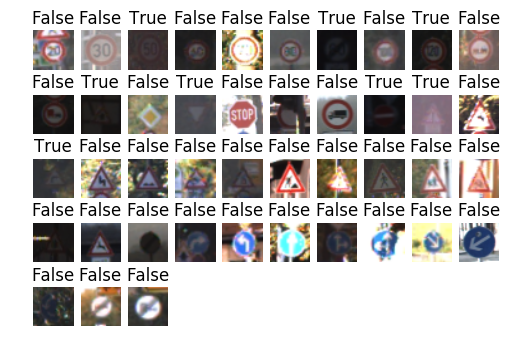

In [14]:
y_cat_cnt = []

gs = gridspec.GridSpec(5, 10)
gs.update(wspace=0.01, hspace=0.02)
plt.figure()

for idx in range(n_classes):
    cnt = y_train == idx
    cnt = cnt.astype(np.float32, copy=False)
    idx_n0 = cnt.nonzero()[0]
    y_cat_cnt.append(idx_n0)    
    
    ax1 = plt.subplot(gs[idx])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    
    plt.subplot(5, 10, idx+1)
    plt.imshow(X_train[idx_n0[0]].squeeze())
    plt.title(str(skimage.exposure.is_low_contrast(X_train[idx_n0[0]].squeeze(), 0.1)))
    plt.axis('off')

True


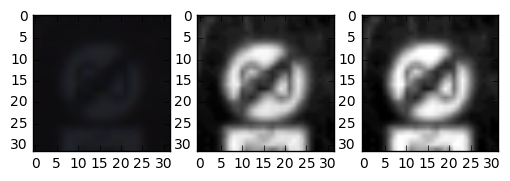

In [15]:
gray_x = rgb2gray(X_train[y_cat_cnt[6][0]].squeeze())
gs = gridspec.GridSpec(1, 3)
gs.update(wspace=0.01, hspace=0.02)
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(X_train[y_cat_cnt[6][0]])
plt.subplot(1, 3, 2)
plt.imshow(gray_x, cmap="gray")
print skimage.exposure.is_low_contrast(gray_x)
p2, p98 = np.percentile(gray_x, (2, 98))
gray_x = skimage.exposure.rescale_intensity(gray_x, (p2, p98), (0, 1))   
plt.subplot(1, 3, 3)
plt.imshow(gray_x, cmap="gray")

In [ ]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
import copy

# Generate new data, Left & right mirror
mirror_id = {19: 20, 20: 19, 33: 34, 34: 33, 36: 37, 37: 36, 38: 39, 39: 38}

X_train_exp = copy.deepcopy(X_train)
y_train_exp = copy.deepcopy(y_train)

In [199]:
print "Mirror augmentation"
for idx in xrange(n_train):
    if y_train[idx] in mirror_id.keys():
        X_train_exp = np.vstack((X_train_exp, np.fliplr(X_train[idx])[np.newaxis, :, :, :]))
        y_train_exp = np.hstack((y_train_exp, np.array([mirror_id[y_train[idx]]])))  

Mirror augmentation


In [298]:
print "Geometry augmentation"
n_train_exp = len(X_train_exp)
X_train_exp = X_train_exp.astype(np.float64) / 255.0
for idx in xrange(n_train_exp):
    X_train_aff, y_train_aff = geometry_augmentation(X_train_exp[idx], y_train_exp[idx])
    X_train_exp = np.vstack((X_train_exp, X_train_aff))
    y_train_exp = np.hstack((y_train_exp, y_train_aff))  

Geometry augmentation


**Save the augmented dataset**

1. data_aug.h5: the dataset after mirror and geometry augmentation
2. data_aug_mirror.h5: the dataset after mirror augmentation 

In [304]:
import h5py
with h5py.File("data_aug.h5", "w") as fi:
    fi.create_dataset("X_train_exp", data=X_train_exp)
    fi.create_dataset("y_train_exp", data=y_train_exp)

In [7]:
import h5py
with h5py.File("data_aug.h5", "r") as fi:
    X_train_exp = fi["X_train_exp"][:]
    y_train_exp = fi["y_train_exp"][:]

In [309]:
with h5py.File("data_aug_mirror.h5", "w") as fi:
    fi.create_dataset("X_train_exp_bak", data=X_train_exp_bak)
    fi.create_dataset("y_train_exp_bak", data=y_train_exp_bak)

In [8]:
with h5py.File("data_aug_mirror.h5", "r") as fi:
    X_train_exp_bak = fi["X_train_exp_bak"][:]
    y_train_exp_bak = fi["y_train_exp_bak"][:]
n_train_mirror = len(X_train_exp_bak)

**Dataset split**

1. Continuous 30 frames
2. The augmented images out of the above frames

In [13]:
# Split train and validation dataset
X_train_sub_idx = np.arange(0, n_train, 30)

y_types = [[] for i in range(n_classes)]

for idx in X_train_sub_idx:
    if idx + 30 <= n_train:
        y_types[y_train_exp[idx]].append(idx)
    
val_type = []    
for t in range(n_classes):
    idx_type = np.random.randint(len(y_types[t]))
    idx_sub = y_types[t][idx_type]
    val_type.append(range(idx_sub, idx_sub+30))
    val_type.append(range(n_train_mirror+idx_sub*5, n_train_mirror+idx_sub*5+150))

val_type = reduce(lambda x, y: x+y, val_type)

X_val = X_train_exp[val_type]
y_val = y_train_exp[val_type]

X_train_part = np.delete(X_train_exp, val_type, axis=0)
y_train_part = np.delete(y_train_exp, val_type, axis=0)

# X_test = X_test.astype(np.float32)

In [14]:
print X_train_part.shape, X_val.shape, X_test.shape

(255408, 32, 32, 3) (7740, 32, 32, 3) (12630, 32, 32, 3)


In [15]:
with h5py.File("data_train_val.h5", "w") as fi:
    fi.create_dataset("X_train_part", data=X_train_part)
    fi.create_dataset("y_train_part", data=y_train_part)
    fi.create_dataset("X_val", data=X_val)
    fi.create_dataset("y_val", data=y_val)

In [7]:
import h5py
with h5py.File("data_train_val.h5", "r") as fi:
    X_train_part = fi["X_train_part"][:]
    y_train_part = fi["y_train_part"][:]
    X_val = fi["X_val"][:]
    y_val = fi["y_val"][:]

In [16]:
print X_train_part.shape, y_train_part.shape, X_val.shape, y_val.shape

(255408, 32, 32, 3) (255408,) (7740, 32, 32, 3) (7740,)


**Pre-processing**

In [33]:
# Global and local contrast enhancement
kernel = create_kernel(3, 5)

from skimage.color import rgb2ycbcr

In [17]:
X_train_part_ycbcr = np.zeros(X_train_part.shape)
for idx in xrange(len(X_train_part)):
    X_train_part_ycbcr[idx] = rgb2ycbcr(X_train_part[idx]).astype(np.float32) / 255.0
    #X_train_part_ycbcr[idx] = X_train_part[idx].astype(np.float32) / 255.0
X_train_part_ycbcr = normalize_input(X_train_part_ycbcr, kernel)
    
X_val_ycbcr = np.zeros(X_val.shape)
for idx in xrange(len(X_val)):
    X_val_ycbcr[idx] = rgb2ycbcr(X_val[idx]).astype(np.float32) / 255.0    
    #X_val_ycbcr[idx] = X_val[idx].astype(np.float32) / 255.0    
X_val_ycbcr = normalize_input(X_val_ycbcr, kernel)    

X_test_ycbcr = np.zeros(X_test.shape)
for idx in xrange(len(X_test)):
    X_test_ycbcr[idx] = rgb2ycbcr(X_test[idx]).astype(np.float32) / 255.0
    #X_test_ycbcr[idx] = X_test[idx].astype(np.float32) / 255.0
X_test_ycbcr = normalize_input(X_test_ycbcr, kernel)

In [18]:
with h5py.File("data_ycbcr.h5", "w") as fi:
    fi.create_dataset("X_train_part_ycbcr", data=X_train_part_ycbcr)
    fi.create_dataset("y_train_part", data=y_train_part)
    fi.create_dataset("X_val_ycbcr", data=X_val_ycbcr)
    fi.create_dataset("y_val", data=y_val)
    fi.create_dataset("X_test_ycbcr", data=X_test_ycbcr)
    fi.create_dataset("y_test", data=y_test)

In [14]:
# gray image contrast stretch
X_train_part_gray = np.zeros(X_train_part.shape[:3]+(1,))
for idx in xrange(len(X_train_part)):
    gray_x = rgb2gray(X_train_part[idx])
    if skimage.exposure.is_low_contrast(gray_x, 0.1) is True:
        p2, p98 = np.percentile(gray_x, (2, 98))
        gray_x = skimage.exposure.rescale_intensity(gray_x, (p2, p98), (0, 1))
        #gray_x = skimage.exposure.equalize_hist(gray_x)
    X_train_part_gray[idx] = gray_x[...,np.newaxis]
    
X_val_gray = np.zeros(X_val.shape[:3]+(1,))
for idx in xrange(len(X_val)):
    gray_x = rgb2gray(X_val[idx])    
    if skimage.exposure.is_low_contrast(gray_x, 0.1) is True:
        p2, p98 = np.percentile(gray_x, (2, 98))
        gray_x = skimage.exposure.rescale_intensity(gray_x, (p2, p98), (0, 1))   
        #gray_x = skimage.exposure.equalize_hist(gray_x)   
    X_val_gray[idx] = gray_x[...,np.newaxis]
    
X_test_gray = np.zeros(X_test.shape[:3]+(1,))
for idx in xrange(len(X_test)):
    gray_x = rgb2gray(X_test[idx])
    if skimage.exposure.is_low_contrast(gray_x, 0.1) is True:
        p2, p98 = np.percentile(gray_x, (2, 98))
        gray_x = skimage.exposure.rescale_intensity(gray_x, (p2, p98), (0, 1))   
        #gray_x = skimage.exposure.equalize_hist(gray_x) 
    X_test_gray[idx] = gray_x[...,np.newaxis]

In [15]:
with h5py.File("data_gray.h5", "w") as fi:
    fi.create_dataset("X_train_part_gray", data=X_train_part_gray)
    fi.create_dataset("y_train_part", data=y_train_part)
    fi.create_dataset("X_val_gray", data=X_val_gray)
    fi.create_dataset("y_val", data=y_val)
    fi.create_dataset("X_test_gray", data=X_test_gray)
    fi.create_dataset("y_test", data=y_test)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

1. Generate more data

From sample investigation in Step 1, we may find that the sample statistics in different categories are not balanced, that is, some categories contain more samples. It is worth noting that, some categories are quite similar, such as "Turn right ahead" and "Turn left ahead", "Go straight or right" and "Go straight or left", where the left/right signs can be made to be right/left through simple left-side-right-side flip. Therefore, the traffic signs with left-side or right-side information can be adopted to supplement its opposite category, and vice verse. Based on this observation, the simplest way to augment the dataset is to flip the images from left to right or right to left in some categories. After this operation, the dataset is more balanced, and the experiments validate that the testing accuracy of different categories is more consistent.

**Supplementation**

Geometric transformation is also an effective way to generate new training samples, as stated in [LeCun's paper](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). The combination of scaling, rotation, translation and shear transformation could be utilized. Based on that paper's setting and some observations, the parameters are randomly perturbed as follows, scale in (0.9, 1.1), translation in (-2, 2), rotations in (-15, 15), shear angle in (-5.7, 5.7). All the parameters could be put into the [AffineTransform](http://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.AffineTransform) function, and new samples could be generated using affine transformation. Five new images are generated for each training sample, and that makes the training set more than 250k. We may generate more samples, but it will take some more time to run, therefore not considered here.

2. Data split

The training dataset is made up of several short continuous frames (usually 30), where each short clip contains a single traffic sign. Therefore, totally random split of the training and validation set is not reasonable, which will make the validation set quite similar to the training set. Based on this observation, the strategy in LeCun's paper is adopted here, that is, randomly selecting one clip (30 frames) from each traffic sign category to construct the validation set which contains 1290 images in total, and the remaining images are adopted as the training set.

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    
    w1 = tf.Variable(tf.truncated_normal([5, 5, 3, 6], mean=mu, stddev=sigma))
    b1 = tf.Variable(tf.zeros(6))    
    
    conv1 = tf.nn.bias_add( tf.nn.conv2d(x, w1, strides=[1, 1, 1, 1], padding='VALID'), b1)
    
    # TODO: Activation.
    
    act1 = tf.nn.relu(conv1)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    
    pool1 = tf.nn.max_pool(act1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    
    w2 = tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean=mu, stddev=sigma))
    b2 = tf.Variable(tf.zeros(16))
    
    conv2 = tf.nn.bias_add( tf.nn.conv2d(pool1, w2, strides=[1, 1, 1, 1], padding='VALID'), b2 )
    
    # TODO: Activation.
    
    act2 = tf.nn.relu(conv2)
    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.

    pool2 = tf.nn.max_pool(act2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    
    fl1 = flatten(pool2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    
    w3 = tf.Variable(tf.truncated_normal([400, 120], mean=mu, stddev=sigma))
    b3 = tf.Variable(tf.zeros(120))
    
    fc1 = tf.nn.bias_add( tf.matmul(fl1, w3), b3 )
    
    # TODO: Activation.
    
    act3 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    
    w4 = tf.Variable(tf.truncated_normal([120, 84], mean=mu, stddev=sigma))
    b4 = tf.Variable(tf.zeros(84))
    
    fc2 = tf.nn.bias_add( tf.matmul(act3, w4), b4 )
    
    # TODO: Activation.
    
    act4 = tf.nn.relu(fc2)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    
    w5 = tf.Variable(tf.truncated_normal([84, 43], mean=mu, stddev=sigma))
    b5 = tf.Variable(tf.zeros(43))
    
    logits = tf.nn.bias_add( tf.matmul(act4, w5), b5 )
    
    return logits

keep_prob = 0.7

def LeNet2(x, test_mode):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    
    w1 = tf.Variable(tf.truncated_normal([5, 5, 3, 6], mean=mu, stddev=sigma))
    b1 = tf.Variable(tf.zeros(6))    
    
    conv1 = tf.nn.bias_add( tf.nn.conv2d(x, w1, strides=[1, 1, 1, 1], padding='VALID'), b1)
    
    # TODO: Activation.
    
    act1 = tf.nn.relu(conv1)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    
    pool1 = tf.nn.max_pool(act1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    
    w2 = tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean=mu, stddev=sigma))
    b2 = tf.Variable(tf.zeros(16))
    
    conv2 = tf.nn.bias_add( tf.nn.conv2d(pool1, w2, strides=[1, 1, 1, 1], padding='VALID'), b2 )
    
    # TODO: Activation.
    
    act2 = tf.nn.relu(conv2)
    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.

    pool2 = tf.nn.max_pool(act2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # TODO: Flatten. Input = 5x5x16 and 14x14x6. Output = 1576.
    
    fl1 = tf.concat(1, [flatten(pool2), flatten(pool1)])
    
    # TODO: Layer 3: Fully Connected. Input = 1576. Output = 120.
    
    w3 = tf.Variable(tf.truncated_normal([1576, 120], mean=mu, stddev=sigma))
    b3 = tf.Variable(tf.zeros(120))
    
    fc1 = tf.nn.bias_add( tf.matmul(fl1, w3), b3 )
    
    # TODO: Activation.
    
    act3 = tf.nn.relu(fc1)
    
    act3 = tf.cond(test_mode, lambda: act3, lambda: tf.nn.dropout(act3, keep_prob=keep_prob))

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    
    w4 = tf.Variable(tf.truncated_normal([120, 84], mean=mu, stddev=sigma))
    b4 = tf.Variable(tf.zeros(84))
    
    fc2 = tf.nn.bias_add( tf.matmul(act3, w4), b4 )
    # logits = tf.nn.bias_add( tf.matmul(act3, w4), b4 )
    
    # TODO: Activation.
    
    act4 = tf.nn.relu(fc2)
    act4 = tf.cond(test_mode, lambda: act4, lambda: tf.nn.dropout(act4, keep_prob=keep_prob))
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    
    w5 = tf.Variable(tf.truncated_normal([84, 43], mean=mu, stddev=sigma))
    b5 = tf.Variable(tf.zeros(43))
    
    logits = tf.nn.bias_add( tf.matmul(act4, w5), b5 )
    
    return logits

def LeNet2_singlechannel(x, test_mode):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    
    w1 = tf.Variable(tf.truncated_normal([5, 5, 1, 6], mean=mu, stddev=sigma))
    b1 = tf.Variable(tf.zeros(6))    
    
    conv1 = tf.nn.bias_add( tf.nn.conv2d(x, w1, strides=[1, 1, 1, 1], padding='VALID'), b1)
    
    # TODO: Activation.
    
    act1 = tf.nn.relu(conv1)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    
    pool1 = tf.nn.max_pool(act1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    
    w2 = tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean=mu, stddev=sigma))
    b2 = tf.Variable(tf.zeros(16))
    
    conv2 = tf.nn.bias_add( tf.nn.conv2d(pool1, w2, strides=[1, 1, 1, 1], padding='VALID'), b2 )
    
    # TODO: Activation.
    
    act2 = tf.nn.relu(conv2)
    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.

    pool2 = tf.nn.max_pool(act2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # TODO: Flatten. Input = 5x5x16 and 14x14x6. Output = 1576.
    
    fl1 = tf.concat(1, [flatten(pool2), flatten(pool1)])
    
    # TODO: Layer 3: Fully Connected. Input = 1576. Output = 120.
    
    w3 = tf.Variable(tf.truncated_normal([1576, 120], mean=mu, stddev=sigma))
    b3 = tf.Variable(tf.zeros(120))
    
    fc1 = tf.nn.bias_add( tf.matmul(fl1, w3), b3 )
    
    # TODO: Activation.
    
    act3 = tf.nn.relu(fc1)
    
    act3 = tf.cond(test_mode, lambda: act3, lambda: tf.nn.dropout(act3, keep_prob=keep_prob))

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    
    w4 = tf.Variable(tf.truncated_normal([120, 84], mean=mu, stddev=sigma))
    b4 = tf.Variable(tf.zeros(84))
    
    fc2 = tf.nn.bias_add( tf.matmul(act3, w4), b4 )
    # logits = tf.nn.bias_add( tf.matmul(act3, w4), b4 )
    
    # TODO: Activation.
    
    act4 = tf.nn.relu(fc2)
    act4 = tf.cond(test_mode, lambda: act4, lambda: tf.nn.dropout(act4, keep_prob=keep_prob))
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    
    w5 = tf.Variable(tf.truncated_normal([84, 43], mean=mu, stddev=sigma))
    b5 = tf.Variable(tf.zeros(43))
    
    logits = tf.nn.bias_add( tf.matmul(act4, w5), b5 )
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
The LeCun's neural network has been successfully applied to hand-written digits recognition, therefore it may give us a good point to start. The LeCun's neural network contains two convolutional layers and three fully connected layers. But different from the original LeCun's network, the first pooling layer output is also adopted to serve as the input of the full connection layer, just like that in [LeCun's paper](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). The purpose of this action is to combine local information from lower layer with the global information from upper layer, which may bring some benefits for classification (the experiment validates that it does improve the classification accuracy). Besides, it can also be observed that the training set accuracy can quickly converge to 1, while the validation accuracy may ascend slowly. That may tell that the training may be a little over-fitting. Therefore, two dropout layers are adopted.

**Supplementation**

The final structure looks like this below.

![CNN](cnn_structure.png)

The input is 3-channel Ycbcr. For gray input, the input dimension will be 32x32, and the first convolution layer will be 5x5x1x6. 

The feature dimension after each output is as follows:

**Input** 32x32x3

**1st layer** convolution: 28x28x6, relu: 28x28x6, max pooling: 14x14x6

**2nd layer** convolution: 10x10x16, relu: 10x10x16, max pooling: 5x5x16

**3rd layer** full connection: 120, relu: 120

**4th layer** full connection: 84, relu: 84

**5th layer** full connection: 43

**Final layer** softmax: 43

In [8]:
### Train your model here.
### Feel free to use as many code cells as needed.

learning_rate = 0.001
epochs = 40
BATCH_SIZE = 128

x = tf.placeholder(tf.float32, [None, 32, 32, 3])
y = tf.placeholder(tf.int32, [None])
one_hot_y = tf.one_hot(y, n_classes)
test_mode = tf.placeholder(tf.bool)

logits = LeNet2(x, test_mode)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.cast( tf.equal( tf.argmax(logits, 1), tf.argmax(one_hot_y, 1) ), tf.float32 )
accuracy_prediction = tf.reduce_mean(correct_prediction)

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_prediction, feed_dict={x: batch_x, y: batch_y, test_mode: True})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

def evaluate_test(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = np.array([])
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(correct_prediction, feed_dict={x: batch_x, y: batch_y, test_mode: True})
        if len(total_accuracy) == 0:
            total_accuracy = accuracy
        else:
            total_accuracy = np.hstack([total_accuracy, accuracy])
    return total_accuracy

In [10]:
from sklearn.utils import shuffle

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train_part_ycbcr)
    
    print("Training ...")
    for i in range(epochs):
        X_train_part_shuffle, y_train_part_shuffle = shuffle(X_train_part_ycbcr, y_train_part)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_part_shuffle[offset:end], y_train_part_shuffle[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, test_mode: False})
        train_accuracy = evaluate(X_train_part_ycbcr, y_train_part)
        validation_accuracy = evaluate(X_val_ycbcr, y_val)
        print("Epoch %d" % i)
        print("Train accu: %f" % train_accuracy)
        print("Validation accu: %f" % validation_accuracy)
    
    saver.save(sess, "./lenet_traffic_sign")
    print("Model saved")

Training ...
Epoch 0
Train accu: 0.784647
Validation accu: 0.648579
Epoch 1
Train accu: 0.869730
Validation accu: 0.761499
Epoch 2
Train accu: 0.913018
Validation accu: 0.810724
Epoch 3
Train accu: 0.927622
Validation accu: 0.825711
Epoch 4
Train accu: 0.942727
Validation accu: 0.846512
Epoch 5
Train accu: 0.945393
Validation accu: 0.853876
Epoch 6
Train accu: 0.952907
Validation accu: 0.848579
Epoch 7
Train accu: 0.959312
Validation accu: 0.880749
Epoch 8
Train accu: 0.963251
Validation accu: 0.864341
Epoch 9
Train accu: 0.966700
Validation accu: 0.868605
Epoch 10
Train accu: 0.969535
Validation accu: 0.872222
Epoch 11
Train accu: 0.963971
Validation accu: 0.879328
Epoch 12
Train accu: 0.974143
Validation accu: 0.879974
Epoch 13
Train accu: 0.971461
Validation accu: 0.875711
Epoch 14
Train accu: 0.974856
Validation accu: 0.883592
Epoch 15
Train accu: 0.974433
Validation accu: 0.883592
Epoch 16
Train accu: 0.977017
Validation accu: 0.888501
Epoch 17
Train accu: 0.975259
Validation accu

In [27]:
from sklearn.utils import shuffle

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train_part)
    
    print("Training ...")
    for i in range(epochs):
        X_train_part_shuffle, y_train_part_shuffle = shuffle(X_train_part_gray, y_train_part)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_part_shuffle[offset:end], y_train_part_shuffle[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, test_mode: False})
        train_accuracy = evaluate(X_train_part_gray, y_train_part)
        validation_accuracy = evaluate(X_val_gray, y_val)
        print("Epoch %d" % i)
        print("Train accu: %f" % train_accuracy)
        print("Validation accu: %f" % validation_accuracy)
    
    saver.save(sess, "./lenet_traffic_sign")
    print("Model saved")

Training ...
Epoch 0
Train accu: 0.716583
Validation accu: 0.726357
Epoch 1
Train accu: 0.825665
Validation accu: 0.825581
Epoch 2
Train accu: 0.882089
Validation accu: 0.862016
Epoch 3
Train accu: 0.906915
Validation accu: 0.885271
Epoch 4
Train accu: 0.920079
Validation accu: 0.917829
Epoch 5
Train accu: 0.926983
Validation accu: 0.921705
Epoch 6
Train accu: 0.936389
Validation accu: 0.920930
Epoch 7
Train accu: 0.946551
Validation accu: 0.942636
Epoch 8
Train accu: 0.947109
Validation accu: 0.955039
Epoch 9
Train accu: 0.954376
Validation accu: 0.941860
Epoch 10
Train accu: 0.960051
Validation accu: 0.959690
Epoch 11
Train accu: 0.959348
Validation accu: 0.956589
Epoch 12
Train accu: 0.962503
Validation accu: 0.967442
Epoch 13
Train accu: 0.964462
Validation accu: 0.973643
Epoch 14
Train accu: 0.964893
Validation accu: 0.967442
Epoch 15
Train accu: 0.965466
Validation accu: 0.975194
Epoch 16
Train accu: 0.970263
Validation accu: 0.975194
Epoch 17
Train accu: 0.967708
Validation accu

Test accu: 0.953682


<Container object of 43 artists>

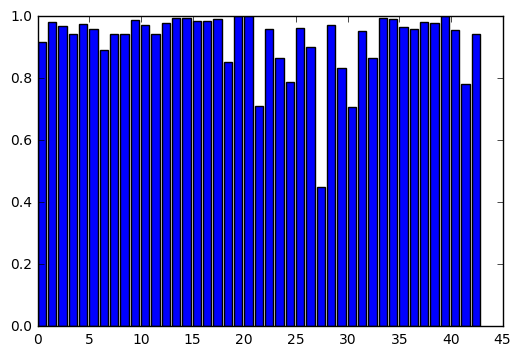

In [11]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test_ycbcr, y_test)
    print("Test accu: %f" % test_accuracy)
    test_accuracy_full = evaluate_test(X_test_ycbcr, y_test)

test_accu_type = [[] for i in xrange(n_classes)]

for idt in xrange(n_classes):
    cnt = y_test == idt
    idx = cnt.nonzero()
    test_accu_type[idt] = test_accuracy_full[idx].mean()
    
plt.figure()
plt.bar(np.arange(n_classes), np.array(test_accu_type))

Test accu: 0.944418


<Container object of 43 artists>

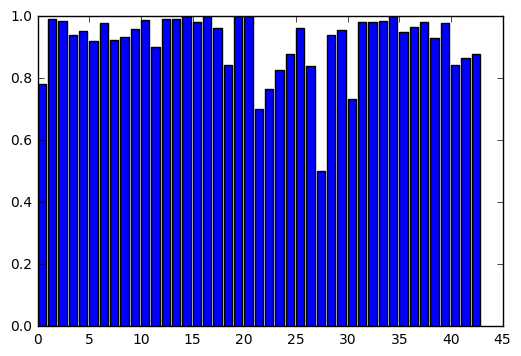

In [28]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test_gray, y_test)
    print("Test accu: %f" % test_accuracy)
    test_accuracy_full = evaluate_test(X_test_gray, y_test)

test_accu_type = [[] for i in xrange(n_classes)]

for idt in xrange(n_classes):
    cnt = y_test == idt
    idx = cnt.nonzero()
    test_accu_type[idt] = test_accuracy_full[idx].mean()
    
plt.figure()
plt.bar(np.arange(n_classes), np.array(test_accu_type))

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

1) optimizer. The Adam optimizer is utilized. Compared with SGD, it lifts the burden of learning rate tuning, which doesn't need to be rigidly set. 

2) Batch size. The batch size is usually set to be squares of 2. To balance the memory cost and training speed, 128 is set.

3) Epoch. In the first submission, the geometric transfomation augmentation has not been applied, and the training dataset is not that big, therefore based on the accuracy on validation set, 23 is enough. However, with the introduction of geometric transformation, the scale of training set has boomed hugely. And more iterations are required. Based on the experiments, 40 is set.

4) Learning rate. As the Adam optimizer is adopted, this parameter is not required to be set rigidly. Therefore, 0.001 is set, which is the default setting.

5) Dropout probability. Two sets of values are adopted for this parameter, just like epoch. In the first submission, the training dataset is not that big, and the training is prone to be over-fitting. Therefore, a low keep probability 0.5 is selected. With the increasing of training set, that low keep probability will make the training slow, therefore, 0.7 is set for the augmented dataset.

6) Other hyper-parameters. The local contrast normalization from [Humphrey's toolkit](https://github.com/ejhumphrey/dl4mir/blob/master/dl4mir/common/lcn.py) has two hyper-parameters, the Hamming window length and Gaussian window length. These two parameters are empirically set to be 3 and 5.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
The most important part is, of course, the feature extraction and classification, which are realized by a neural network. LeCun's CNN (in 92) is a good start point. In the first try, a 2-layer convolution following 3-layer fully connection with 43-dimensional output is utilized for classification, just like the experiments in previous lectures. The input is a 3-channel RGB image with dimension 32x32. The network is trained on the randomly selected training set (not totally random indeed), and gives a testing accuracy about 89%, not a bad start.

By observing several training images, it can be found that some of them are of low quality, even cannot be distinguished by eyes. Therefore, to further improve the testing accuracy, the contrast improvement operation is necessary. A global plus local contrast normalization strategy is adopted from LeCun's paper (in 11), which manipulates the Y-channel after converting the original RGB image to YCbCr image. After this step, the testing accuracy gets to 92%.

After careful observation of different traffic sign categories, we may find that some sorts of traffic signs are symmetric about each other, specifically those ones with left/right information. By flipping those traffic signs left to right/right to left, we could produce the opposite. Meanwhile, it is worth noting that, those opposite signs about left/right information are not balanced, such as the "keep right" with samples more than 2000, while "keep left" less than 500. Obviously, the flipping operation could reasonably augment the training samples. After this step, the testing accuracy gets to almost 93%.

As LeCun's paper stated, they concatenated the first pooling layer with the second pooling layer to form the input of fully connected layer. The benefit is that they could combine the global and local information. This structure is also adopted to further improve performance. However, that will make the fully connected layer dimension boost from 400 to 1576. One concern is that the boosted variables may cause over-fit. Therefore, a dropout layer is added after each fully connected layer. The final testing accuracy arrives at more than 94%.

**Supplementation**

With the training set further augmented using geometric transformation, the testing accuracy is improved a little bit more, 95.4%.

The gray input is also a good try, but it is not that good as YCbCr input. The final testing accuracy is 94.4%.

In fact, as the training set becomes so big, one-time training will take a quite long time. Therefore the parameters are not carefully tuned. But we can imagine that, with more careful parameter tuning and more training data, the testing accuracy will be further improved.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [70]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import skimage.io
import skimage.transform

In [71]:
imgnames = os.listdir("./wildimages/")

X_wild = np.zeros([len(imgnames), 32, 32, 3])
y_wild = np.zeros(len(imgnames), dtype=np.int32)

for idx in xrange(len(imgnames)):
    imgname = imgnames[idx]
    name, ext = os.path.splitext(imgname)
    y_wild[idx] = int(name)
    img = skimage.io.imread(os.path.join("./wildimages", imgname))
    img = skimage.transform.resize(img, [32, 32, 3])
    X_wild[idx] = img

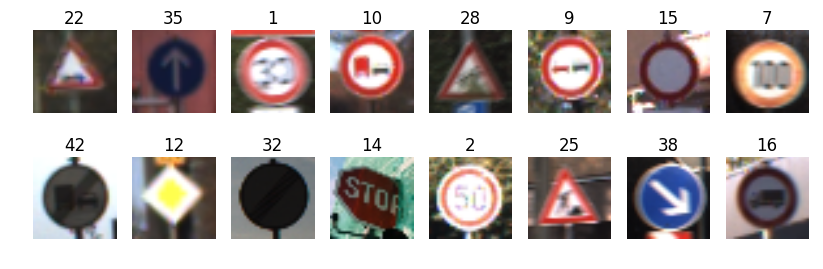

In [72]:
gs = gridspec.GridSpec(2, 8)
gs.update(wspace=0.01, hspace=0.001)
plt.figure(figsize=(10,3))

for idx in xrange(len(X_wild)):
    
    plt.subplot(2, 8, idx+1)
    plt.imshow(X_wild[idx].squeeze())
    plt.title("%d" % y_wild[idx])
    plt.axis('off')

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
16 testing samples are given, 15 of whom are cropped from [German Traffic Sign Detection Benchmark](http://benchmark.ini.rub.de/?section=gtsdb&subsection=dataset), except the stop sign download from internet. Those images usually have low resolution, and some are a little blurry or with low contrast. But the testing results are pretty good. Three samples are tested wrong, the "road closed" sign, the "stop" sign and the "bumpy road" sign. The "stop" sign is partially corrupted while the "bumpy road" sign is not very clear. As for the "road closed" sign, it is indeed not included in the training set.

In [73]:
X_wild_ycbcr = np.zeros(X_wild.shape)
for idx in xrange(len(X_wild)):
    X_wild_ycbcr[idx] = rgb2ycbcr(X_wild[idx]).astype(np.float32) / 255.0
X_wild_ycbcr = normalize_input(X_wild_ycbcr, kernel)

In [74]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
saver = tf.train.Saver()
probs = tf.nn.softmax(logits)
with tf.Session() as sess:
    saver.restore(sess, "./lenet_traffic_sign")
    prob_wild = sess.run(probs, feed_dict={x: X_wild_ycbcr, test_mode:True})
    accuracy_wild = evaluate(X_wild_ycbcr, y_wild)
    print("Wild Test accu: %f" % accuracy_wild)
    accuracy_wild_single = evaluate_test(X_wild_ycbcr, y_wild)

Wild Test accu: 0.937500


In [75]:
# The prediction accuracy for each single sample
print accuracy_wild_single

[ 1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
2 out of 16 testing samples are wrong, that is, testing accuracy is 87.5%.

**Supplementation**

With training data further augmentation, 1 out of 16 testing samples is wrong, that is, testing accuracy is improved to 93.75%. The "Stop" sign can also be predicted correctly, which is different from samples in the original training set.

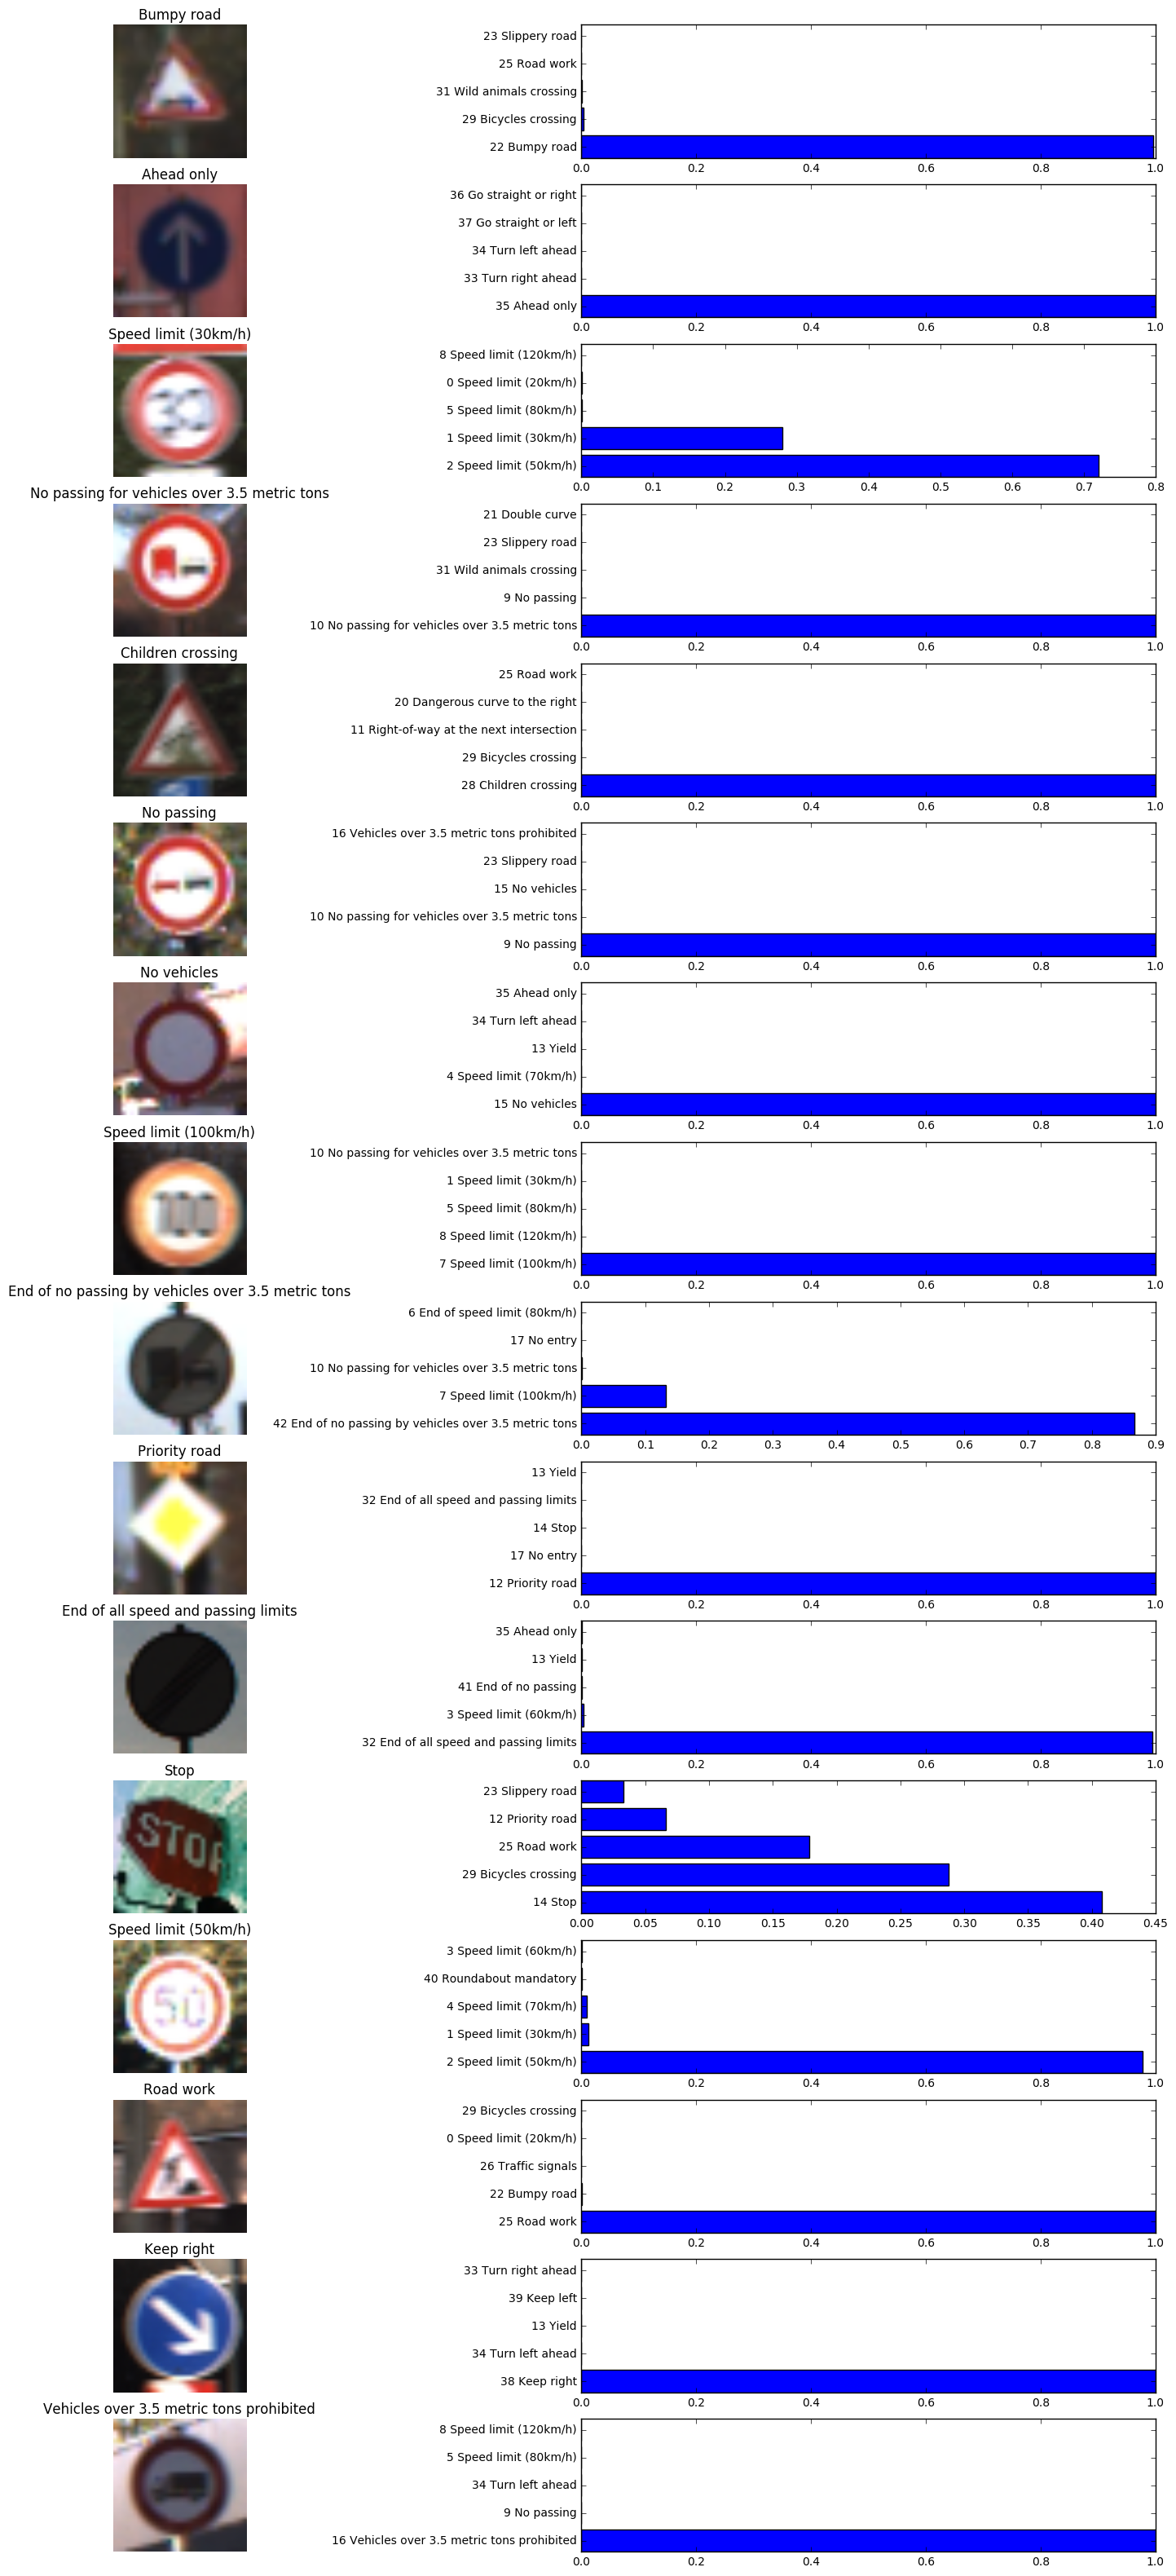

In [85]:
gs = gridspec.GridSpec(16, 2)
gs.update(wspace=1, hspace=1)
plt.figure(figsize=(20, 40))
for idx in xrange(len(X_wild)):
    sort_imgs = np.argsort(prob_wild[idx])
    plt.subplot(16, 2, idx*2+1)
    plt.imshow(X_wild[idx])
    plt.title(sign_dict[str(y_wild[idx])])
    plt.axis('off')
    ax = plt.subplot(16, 2, idx*2+2)
    ax.set_yticks(np.arange(5))
    ax.set_yticklabels(map(lambda i: str(i) + " " + sign_dict[str(i)], sort_imgs[-1:-6:-1]), rotation='horizontal')
    plt.barh(np.arange(5), prob_wild[idx][sort_imgs[-1:-6:-1]], height=0.8, color='b', align='center')

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
Except the "Stop" sign, which is a little distorted, the other 14 correct predictions are all with high confidence. Even though the "speed 30 limit" sign is predicted to be the "speed 50 limit", and they do seems similar, the correct prediction is within top 2 predictions. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [76]:
with tf.Session() as sess:
    val, ind = sess.run(tf.nn.top_k(tf.constant(prob_wild), k=3))

In [77]:
# top-3 prediction probability
print val

[[  9.96454716e-01   2.95113213e-03   3.86858155e-04]
 [  1.00000000e+00   1.31658878e-10   3.33111247e-11]
 [  7.20092356e-01   2.79579818e-01   2.37382992e-04]
 [  9.99996305e-01   3.67424150e-06   2.36432953e-08]
 [  9.99990702e-01   8.25667576e-06   7.18413844e-07]
 [  1.00000000e+00   1.07298220e-12   7.33661399e-16]
 [  1.00000000e+00   2.29846545e-10   1.72704375e-12]
 [  9.99915838e-01   8.35962201e-05   5.35103482e-07]
 [  8.67342234e-01   1.31933913e-01   6.15321042e-04]
 [  1.00000000e+00   9.15708210e-14   3.51810981e-21]
 [  9.94296491e-01   3.91356321e-03   7.42137374e-04]
 [  4.07960415e-01   2.87735373e-01   1.78708673e-01]
 [  9.77766037e-01   1.26970205e-02   9.20850784e-03]
 [  9.99579966e-01   4.15194809e-04   2.17710135e-06]
 [  1.00000000e+00   2.86296328e-22   1.09826950e-28]
 [  1.00000000e+00   7.17193416e-10   4.55650739e-10]]


In [78]:
# the first 3 columns are the top-3 prediction IDs, and the last column is the ground-truth
# the 7th is the "road closed" sign, which is not included, and just set to be 0 arbitrarily
print np.hstack([ind, np.reshape(y_wild, [16, 1])])

[[22 29 31 22]
 [35 33 34 35]
 [ 2  1  5  1]
 [10  9 31 10]
 [28 29 11 28]
 [ 9 10 15  9]
 [15  4 13 15]
 [ 7  8  5  7]
 [42  7 10 42]
 [12 17 14 12]
 [32  3 41 32]
 [14 29 25 14]
 [ 2  1  4  2]
 [25 22 26 25]
 [38 34 13 38]
 [16  9 34 16]]
